In [139]:
import pandas as pd
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plot

In [140]:
sales_conn = sqlite3.connect("../week 2/go_sales.sqlite")

order_details  = pd.read_sql("SELECT * FROM order_details", sales_conn)
product = pd.read_sql("SELECT * FROM product", sales_conn)
product_type = pd.read_sql("SELECT * FROM product_type", sales_conn)
product_line = pd.read_sql("SELECT * FROM product_line", sales_conn)
order_method = pd.read_sql("SELECT * FROM order_method", sales_conn)
order_header = pd.read_sql("SELECT * FROM order_header", sales_conn)
retailer_site = pd.read_sql("SELECT * FROM retailer_site", sales_conn)


order = pd.merge(order_details, product, on='PRODUCT_NUMBER')
order_type = pd.merge(order, product_type, on='PRODUCT_TYPE_CODE')
merged = pd.merge(order_type, product_line, on='PRODUCT_LINE_CODE')

df = merged.loc[:, ['PRODUCT_LINE_EN',  'QUANTITY']]

df

,PRODUCT_LINE_EN,QUANTITY
0,Outdoor Protection,16
1,Outdoor Protection,20
2,Outdoor Protection,24
3,Outdoor Protection,18
4,Outdoor Protection,20
...,...,...
43058,Outdoor Protection,146
43059,Outdoor Protection,172
43060,Outdoor Protection,192
43061,Outdoor Protection,192


In [141]:
dummies_df_product_line = pd.get_dummies(df.loc[:, ['PRODUCT_LINE_EN']])

df = pd.concat([df, dummies_df_product_line], axis = 1)
df = df.drop(['PRODUCT_LINE_EN'], axis = 1)
df

x = df.drop('QUANTITY', axis = 1)

y = df.loc[:, ['QUANTITY']]
x

#ONAFHANKELIJKHEDEN: QUANTITY ORDER_DATE PRODUCT_NUMBER PRODUCT_TYPE_CODE 

,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
43058,False,False,False,True,False
43059,False,False,False,True,False
43060,False,False,False,True,False
43061,False,False,False,True,False


In [142]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.15,
    random_state = 42
)

y_train

,QUANTITY
2891,38
23026,36
3366,36
36010,90
10289,32
...,...
6265,40
11284,22
38158,24
860,18


In [143]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [144]:
y_pred = reg_model.predict(x_test)
y_pred

array([[53.09228516],
       [18.91943359],
       [43.05639648],
       ...,
       [53.09228516],
       [18.91943359],
       [53.09228516]])

In [145]:
pred_df = pd.DataFrame(y_pred)
pred_df = pred_df.rename(columns = {0 : "Predicted_Sales_Quantity"})
pred_df

,Predicted_Sales_Quantity
0,53.092285
1,18.919434
2,43.056396
3,53.092285
4,43.056396
...,...
6455,43.056396
6456,44.230469
6457,53.092285
6458,18.919434


In [146]:
y_pred_merge = pd.concat([y_test.reset_index()['QUANTITY'], pred_df], axis = 1)
y_pred_merge.loc[y_pred_merge['Predicted_Sales_Quantity'].notna(), :]

,QUANTITY,Predicted_Sales_Quantity
0,34,53.092285
1,24,18.919434
2,18,43.056396
3,52,53.092285
4,24,43.056396
...,...,...
6455,50,43.056396
6456,36,44.230469
6457,24,53.092285
6458,34,18.919434


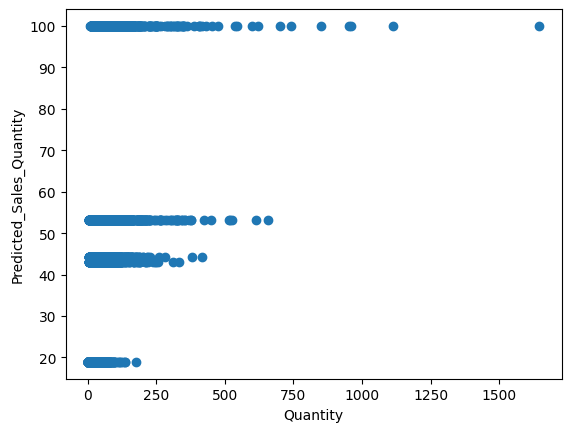

In [147]:
plot.scatter(y_pred_merge['QUANTITY'], y_pred_merge['Predicted_Sales_Quantity'])
plot.xlabel('Quantity')
plot.ylabel('Predicted_Sales_Quantity')
plot.show()

In [148]:
mean_absolute_error(y_pred_merge['QUANTITY'], y_pred_merge['Predicted_Sales_Quantity'])

31.43491294081366

In [149]:
mean_squared_error(y_pred_merge['QUANTITY'], y_pred_merge['Predicted_Sales_Quantity'])

3461.958129294092